In [40]:
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob
%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['font.size'] = 22

In [41]:
file_list = []
folder = glob("./wabfor*.txt")
print(folder)
length = len(folder)
file_list = [None] * length

for index, phile in enumerate(folder):
    file_list[index] = phile

['./wabfor_300_0001.txt', './wabfor_300_001.txt', './wabfor_300_01.txt', './wabfor_166_01.txt', './wabfor_166_001.txt', './wabfor_166_0001.txt']


In [42]:
idx = 5
jdx = 2
kdx = 3
data  = np.loadtxt(file_list[idx], comments = "#")
data2 = np.loadtxt(file_list[jdx], comments = "#")
data3 = np.loadtxt(file_list[kdx], comments = "#")

mass = 300.E-9#float(file_list[idx][2:5]) * 1E-9
mass2= 300.E-9#float(file_list[jdx][2:5]) * 1E-9
mass3= 300.E-9#float(file_list[kdx][2:5]) * 1E-9
angl = float("0." + file_list[idx][-5:-4])
angl2= float("0." + file_list[jdx][-6:-4])
#angl3= float("0." + file_list[kdx][-7:-4])

wabs = data[:,0]
wabs2=data2[:,0]
wabs3=data3[:,0]
dataN= data[:,1]
dataN2=data2[:,1]
dataN3=data3[:,1]
dataM= data[:,2]
dataM2=data2[:,2]
dataM3=data3[:,3]
ll    = data[:,3]
ll2   =data2[:,3]
ll3   =data3[:,3]

hbar = 6.582119569E-16
v    = 1000 * 100
d = 2.2
#ll = 1 - np.exp(-2 * d * wabs / (hbar * v ))

In [43]:
print(ll[:5])

[0.00074977 0.0008412  0.00094378 0.00105888 0.00118804]


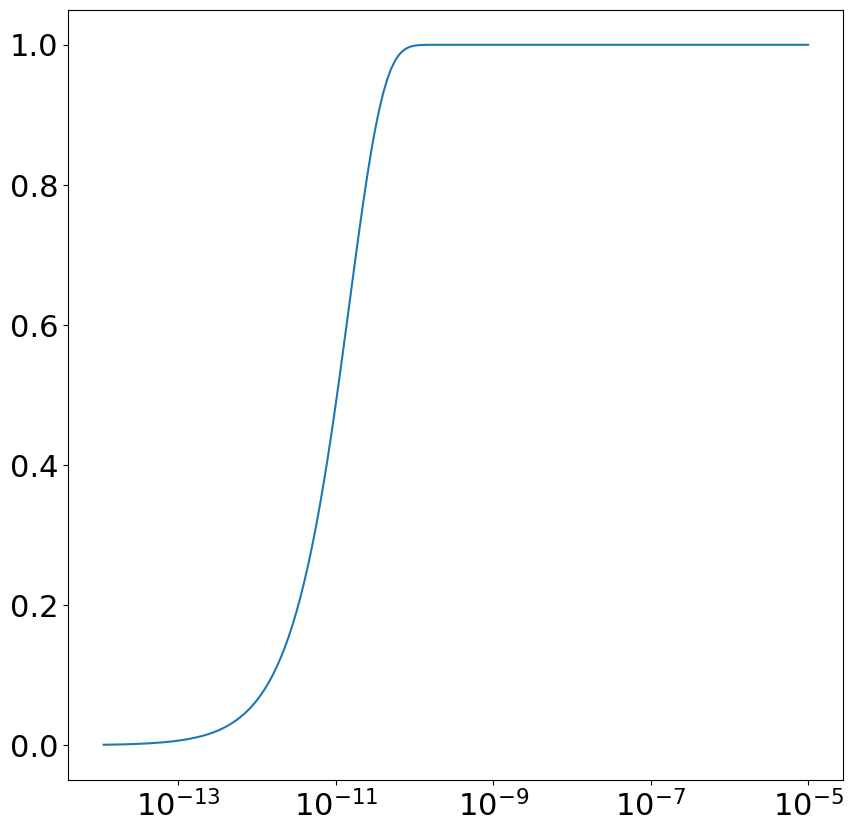

In [44]:
plt.semilogx(wabs, ll3)

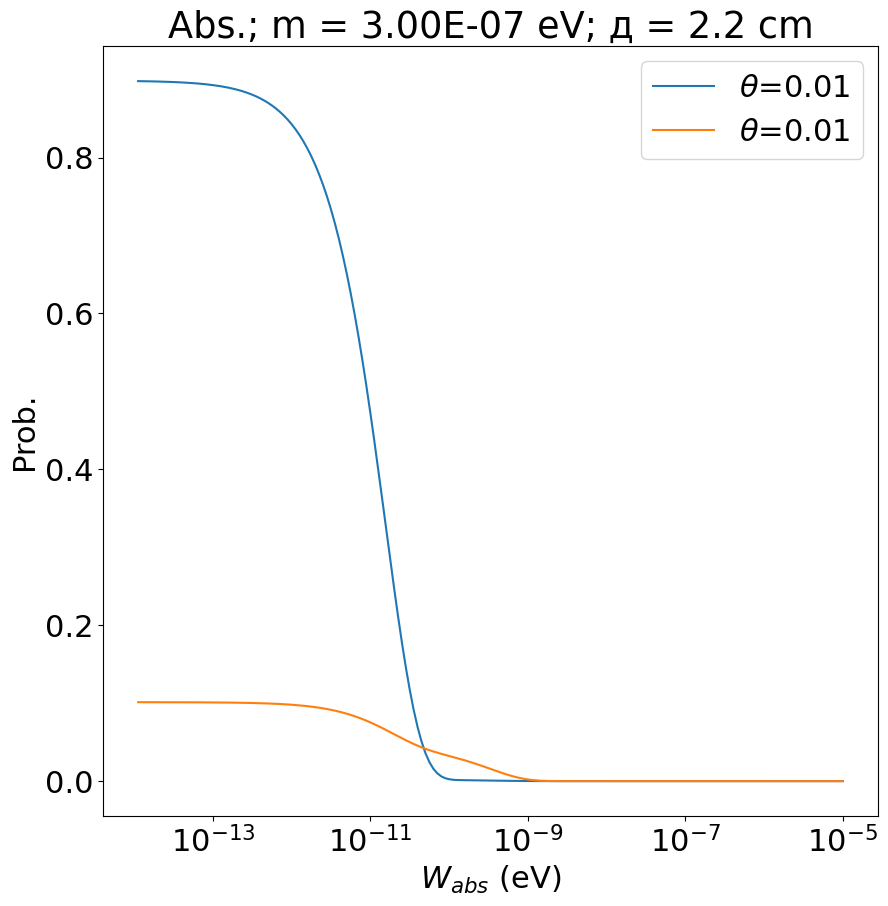

In [48]:
log = True
plt.title(r"Abs.; m = {:.2E} eV; д = 2.2 cm".format(300E-9))
plt.xlabel(r"$W_{abs}$ (eV)")
plt.ylabel(r"Prob.")
#plt.loglog(wabs, 1 - dataN,  label = r"$\theta$={}".format(angl))
plt.semilogx(wabs, dataN2, label = r"$\theta$={}".format(angl2))
plt.semilogx(wabs, dataM2, label = r"$\theta$={}".format(angl2))
#plt.loglog(wabs, 1 - dataN3, label = r"$\theta$={}".format(angl3))
plt.legend()

In [46]:
print(dataN2[0])
print(dataM2[0])

0.898056568
0.101257573


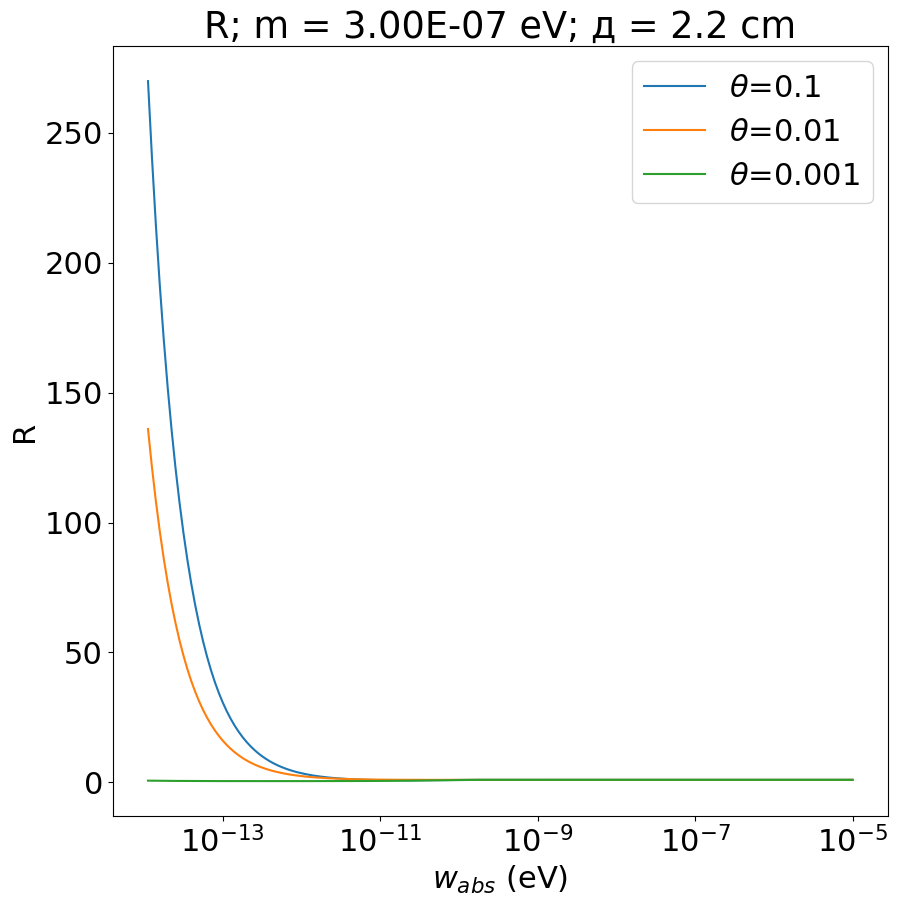

In [47]:
log = False
plt.title(r"R; m = {:.2E} eV; д = 2.2 cm".format(mass))
if log:
    plt.loglog(wabs, (1 - dataN - dataM)/ ll, label = f"m={angl}")
    plt.loglog(wabs, (1 - dataN2 - dataM2) / ll2, label = f"m={angl2}")
    plt.loglog(wabs, (1 - dataN3 - dataM3) / ll3, label = f"m={angl3}")
else:
    plt.semilogx(wabs, (1 - dataN)/ ll, label = r"$\theta$={}".format(angl))
    plt.semilogx(wabs, (1 - dataN2) / ll2, label = r"$\theta$={}".format(angl2))
    plt.semilogx(wabs, (1 - dataN3) / ll3, label = r"$\theta$={}".format(angl3))
plt.xlabel(r"$w_{abs}$ (eV)")
plt.ylabel(r"R")
plt.legend()
plt.show()